In [1]:
import pandas as pd
import sqlite3

db_path = r'website_data.db'
conn = sqlite3.connect(db_path)

In [2]:
query = '''
Select *
FROM Interactions
'''
interactions = pd.read_sql(query, conn)

In [3]:
interactions.dtypes

id              int64
visitor_id     object
channel        object
page           object
interaction    object
element        object
timestamp      object
dtype: object

In [6]:
interactions['timestamp'] = pd.to_datetime(interactions['timestamp'])

<Axes: xlabel='timestamp'>

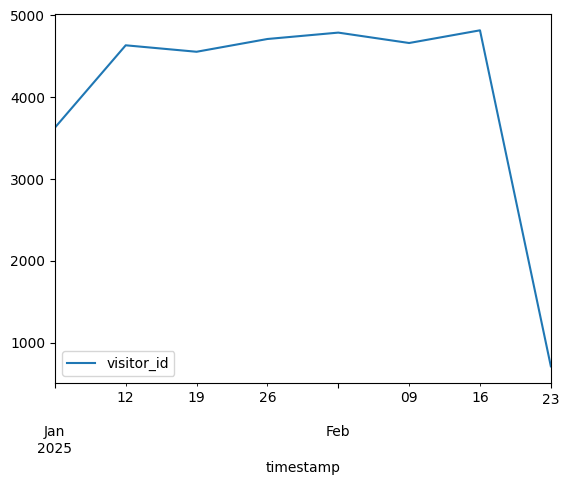

In [7]:
weekly_traffic = interactions[['timestamp','visitor_id']].groupby(pd.Grouper(key='timestamp',freq='W')).nunique()
weekly_traffic.plot()

<Axes: xlabel='timestamp'>

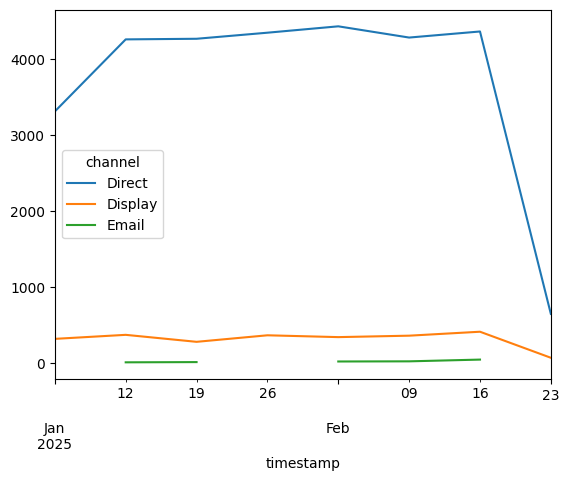

In [8]:
interactions['timestamp'] = pd.to_datetime(interactions['timestamp'])
weekly_channel_traffic = interactions[['channel','timestamp','visitor_id']].groupby([pd.Grouper(key='timestamp',freq='W'),'channel']).nunique()\
    .reset_index()\
        .pivot(index='timestamp',columns='channel',values='visitor_id')

weekly_channel_traffic.plot()